## Jackie Chan and Tom Cruise Recognition Model (CNN)
***Created by: Engg. Muhammad Saleem Raza***

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

### Data Augmentation

In [21]:
img_gen = image.ImageDataGenerator(
                rotation_range=30,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.2,
                zoom_range=0.2,
                fill_mode='nearest',
                horizontal_flip=True,
                rescale=1./255,   
                )

### Image Data For Training and Testing

In [26]:
img_gen_params = dict(batch_size=16, target_size=(150, 150), class_mode='binary')

In [27]:
path = 'E:/Downloads/datasets/actors_tom_jackie/train'  # change as your need
train = img_gen.flow_from_directory(, **img_gen_params)

Found 300 images belonging to 2 classes.


In [28]:
'E:/Downloads/datasets/actors_tom_jackie/test'  # change as your need
valid = img_gen.flow_from_directory(, **img_gen_params)

Found 81 images belonging to 2 classes.


### Network of CNN

In [23]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

### Compiling Network CNN

In [25]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['acc'])

### Model Training

In [29]:
result_training = model.fit_generator(generator=train, epochs=12, steps_per_epoch=150, validation_data=valid, validation_steps=12)

Epoch 1/12
150/150 [==============================] - 140s 931ms/step - loss: 0.6314 - acc: 0.6220 - val_loss: 0.5735 - val_acc: 0.6790
Epoch 2/12
150/150 [==============================] - 140s 930ms/step - loss: 0.4953 - acc: 0.7618 - val_loss: 0.5434 - val_acc: 0.7099
Epoch 3/12
150/150 [==============================] - 143s 950ms/step - loss: 0.3165 - acc: 0.8653 - val_loss: 0.2602 - val_acc: 0.8951
Epoch 4/12
150/150 [==============================] - 142s 946ms/step - loss: 0.2419 - acc: 0.9001 - val_loss: 0.2014 - val_acc: 0.8951
Epoch 5/12
150/150 [==============================] - 139s 930ms/step - loss: 0.2007 - acc: 0.9177 - val_loss: 0.2189 - val_acc: 0.9321
Epoch 6/12
150/150 [==============================] - 149s 994ms/step - loss: 0.1366 - acc: 0.9518 - val_loss: 0.3136 - val_acc: 0.8519
Epoch 7/12
150/150 [==============================] - 151s 1s/step - loss: 0.1251 - acc: 0.9511 - val_loss: 0.2270 - val_acc: 0.8827
Epoch 8/12
150/150 [==============================]

### Evaluation By Using Test Data

In [53]:
eval_loss, eval_acc = model.evaluate_generator(valid)

In [60]:
print('Accuracy:', eval_loss)
print('Loss:', eval_acc)

Accuracy: 0.14784023051652184
Loss: 0.9382716


### Graph For Training and Validation (Accuracy and Loss)

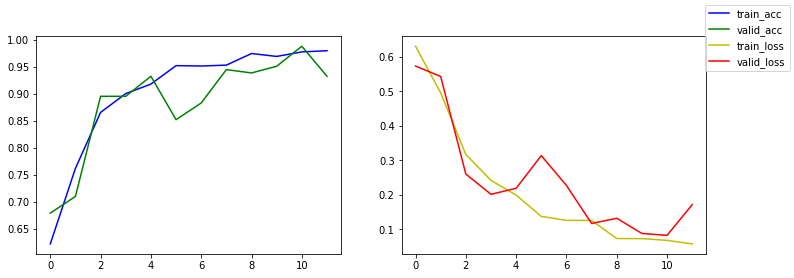

In [59]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(121)
ax.plot(result_training.history['acc'], color='b', label='train_acc')
ax.plot(result_training.history['val_acc'], color='g', label='valid_acc')

ax2 = fig.add_subplot(122)
ax2.plot(result_training.history['loss'], color='y', label='train_loss')
ax2.plot(result_training.history['val_loss'], color='r', label='valid_loss')

fig.legend()

### Type of Classes

In [39]:
train.class_indices

{'Jackie Chan': 0, 'Tom Cruise': 1}

### Saving Model

In [35]:
model.save('model_jackie_tom.h5')
model.save_weights('weights_model_jackie_tom.h5')

### Loading Saved Model

In [3]:
m = load_model('model_jackie_tom.h5')

### Testing on a Particular Image

Jackie Chan


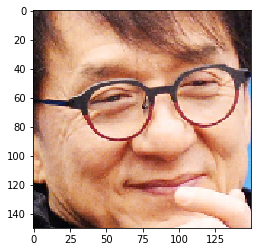

In [10]:
path = 'images/jackie.jpg' # change path as your need

img = image.load_img(path, target_size=(150,150)) 
img = image.img_to_array(img)
img = img / 255

plt.imshow(img)

img = np.expand_dims(img, axis=0)

if m.predict_classes(img)[0][0] == 0:
    print('Jackie Chan')
else:
    print('Tom Cruise')